In [1]:
%load_ext autoreload
%autoreload 2

# Business-as-usual analysis

In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from ema_workbench import load_results
from unbreakable.analysis.analyzer import *
from unbreakable.analysis.visualizer import *
sns.set_theme(style="ticks")

In [3]:
# Parameters for report writing
savefig = False
savetab = False

## Load results

In [5]:
# Load results
n_scenarios = 48
n_policies = 0
results = load_results(f'../experiments/scenarios={n_scenarios}, policies={n_policies}.tar.gz')

# Prepare outcomes
outcomes = prepare_outcomes(results, add_uncertainties=False, add_policies=False)

## EDA

### Single scenario, single district 

In [6]:
# Print all outcomes for a single scenario
scenario = 0
df = outcomes[outcomes['scenario'] == scenario].copy()
df.set_index('district', inplace=True)
df.drop(columns=['weighted_vuln_quint', 'weighted_vuln_dec'], inplace=True)
numeric_columns = df.columns[3:-1].tolist()
df[numeric_columns].round(2).style.format("{:,.2f}")

,total_population,total_asset_loss,total_consumption_loss,tot_exposed_asset,tot_asset_surv,expected_loss_frac,n_affected_people,annual_average_consumption,poverty_line_adjusted,district_pml,n_poor_initial,n_poor_affected,n_new_poor,initial_poverty_gap,new_poverty_gap_initial,new_poverty_gap_all,annual_average_consumption_loss,annual_average_consumption_loss_pct,mean_recovery_rate,r,n_new_poor_increase_pp
district,,,,,,,,,,,,,,,,,,,,,
Anse-La-Raye & Canaries,"8,666.91","1,252,386.29","856,381.15","47,442,177.05","334,331,195.84",0.03,779.47,"1,591.22",914.27,"1,282,936.18","3,292.00",356.00,11.00,32.85,33.69,33.61,109.87,8.43,0.17,0.21,0.13
Castries,"70,959.09","30,295,471.85","23,631,014.64","1,587,405,663.34","3,435,721,049.12",0.02,"4,630.26","6,213.45","2,976.86","31,062,668.40","15,948.00",974.00,93.00,34.78,35.03,34.99,510.36,8.93,0.23,1.68,0.13
Choiseul,"5,475.87","1,069,027.21","845,565.29","54,354,802.37","377,890,219.98",0.02,380.37,"1,932.86",926.75,"1,111,847.84",923.00,30.00,62.00,26.55,26.90,26.40,222.30,14.28,0.23,0.24,1.13
Dennery,"11,590.78","2,566,059.90","1,586,696.91","125,372,604.01","417,528,403.13",0.02,"1,089.42","3,383.57","1,934.66","2,667,414.34","5,216.00",734.00,0.00,23.52,24.14,24.14,145.65,6.25,0.13,0.64,0.00
Gros Islet,"27,467.06","10,420,641.65","7,487,964.89","532,061,766.39","3,294,339,146.51",0.02,"2,340.84","2,841.95","1,040.60","10,932,607.53","3,245.00",112.00,99.00,15.39,15.53,15.23,319.88,6.83,0.16,1.07,0.36
Laborie,"6,828.32","2,117,612.64","1,552,310.48","99,235,698.32","215,695,044.06",0.02,453.43,"5,123.26","2,964.26","2,035,118.22","1,599.00",139.00,28.00,23.26,23.59,23.31,342.35,6.70,0.16,2.11,0.41
Micoud,"17,435.51","4,551,037.47","3,003,347.61","231,995,156.10","554,020,360.02",0.02,"1,016.45","6,056.25","2,698.00","4,766,541.74","5,433.00",149.00,9.00,38.18,38.30,38.32,295.47,6.12,0.18,1.67,0.05
Soufriere,"8,985.05","1,626,330.12","1,200,197.42","82,756,712.06","535,928,432.44",0.02,566.66,"2,953.40",994.91,"1,679,254.31","2,295.00",123.00,47.00,31.47,31.77,31.33,211.80,10.06,0.23,0.52,0.52
Vieuxfort,"15,229.37","4,088,333.15","3,206,308.45","216,534,648.76","1,266,550,258.12",0.02,"1,111.55","2,121.05","1,101.52","4,264,030.49","5,272.00",465.00,0.00,23.35,23.73,23.73,288.45,6.64,0.18,0.90,0.00


In [7]:
# Let's examine a single scenario in details
scenario = 0
df = outcomes[outcomes['scenario'] == scenario].copy()
df.set_index('district', inplace=True)

# And a single district as an example
district = 'Dennery'
print('District: ', district)
total_population = round(df.loc[district, 'total_population'])
n_affected = round(df.loc[district, 'n_affected_people'])
print('Total population: ', total_population)
print('Number of affected people: ', n_affected)

n_poor_initial = round(df.loc[district, 'n_poor_initial'])
n_new_poor = round(df.loc[district, 'n_new_poor'])
pct_poor_initial = round(n_poor_initial / total_population * 100, 2)
pct_new_poor = round((n_new_poor + n_poor_initial) / total_population * 100, 2)
pct_poor_increase = round(n_new_poor / total_population * 100, 2)
initial_poverty_gap = round(df.loc[district, 'initial_poverty_gap'], 2)
new_poverty_gap_init = round(df.loc[district, 'new_poverty_gap_initial'], 2)
new_poverty_gap_all = round(df.loc[district, 'new_poverty_gap_all'], 2)
print()
print('Number of poor: ', n_poor_initial)
print('Number of new poor: ', n_new_poor)
print(f'Percentage of poor: {pct_poor_initial}%')
print(f'Percentage of new poor: {pct_new_poor}%')
print(f'Percentage of increase in poor: {pct_poor_increase}%')
print('Initial poverty gap: ', initial_poverty_gap)
print('New poverty gap initial poor: ', new_poverty_gap_init)
print('New poverty gap all poor: ', new_poverty_gap_all)

annual_average_consumption = round(df.loc[district, 'annual_average_consumption'])
annual_average_consumption_loss = round(df.loc[district, 'annual_average_consumption_loss'])
annual_average_consumption_loss_pct = round(df.loc[district, 'annual_average_consumption_loss_pct'])
print()

print('Annual average consumption: ', annual_average_consumption)
print('Annual average consumption loss: ', annual_average_consumption_loss)
print(f'Annual average consumption loss percentage: {annual_average_consumption_loss_pct}%')

print()
r = round(df.loc[district, 'r'], 2)
print('Socio-economic resilience: ', r)

District:  Dennery
Total population:  11591
Number of affected people:  1089

Number of poor:  5216
Number of new poor:  0
Percentage of poor: 45.0%
Percentage of new poor: 45.0%
Percentage of increase in poor: 0.0%
Initial poverty gap:  23.52
New poverty gap initial poor:  24.14
New poverty gap all poor:  24.14

Annual average consumption:  3384
Annual average consumption loss:  146
Annual average consumption loss percentage: 6%

Socio-economic resilience:  0.64


In [7]:
# annotated_hist(outcomes, savefig)

In [21]:
# # Print all outcomes for a single scenario
# district = 'Dennery'
# df = outcomes[outcomes['district'] == district].copy()
# df.drop(columns=['years_in_poverty'], inplace=True)
# columns_of_interest = ['total_consumption_loss', 
#                        'n_affected_people', 'annual_average_consumption', 'n_new_poor', 'n_poor_affected',
#                        'annual_average_consumption_loss', 'annual_average_consumption_loss_pct', 'r', 'n_new_poor_increase_pp']
# # sns.pairplot(df[columns_of_interest])

### Multiple scenarios & multiple districts

In [9]:
# Let's aggregate across scenarios and take the mean
outcomes.iloc[:, 2:-1].groupby('district').mean(numeric_only=True).round(2)

,total_population,total_asset_loss,total_consumption_loss,tot_exposed_asset,tot_asset_surv,expected_loss_frac,n_affected_people,annual_average_consumption,poverty_line_adjusted,district_pml,...,n_poor_affected,n_new_poor,initial_poverty_gap,new_poverty_gap_initial,new_poverty_gap_all,annual_average_consumption_loss,annual_average_consumption_loss_pct,mean_recovery_rate,r,n_new_poor_increase_pp
district,,,,,,,,,,,,,,,,,,,,,
Anse-La-Raye & Canaries,8666.91,1274724.51,806358.63,4.744218e+07,3.343312e+08,0.03,825.58,1591.22,914.27,1282936.18,...,293.73,7.50,32.85,33.33,33.27,100.30,6.96,0.15,0.26,0.09
Castries,70959.09,30783623.85,21887223.18,1.587406e+09,3.435721e+09,0.02,4173.08,6213.45,2976.86,31062668.40,...,965.08,211.00,34.78,35.14,34.80,541.44,8.72,0.18,2.61,0.30
Choiseul,5475.87,1108464.32,885314.63,5.435480e+07,3.778902e+08,0.02,365.93,1932.86,926.75,1111847.84,...,53.40,43.42,26.55,27.08,26.53,248.56,12.94,0.22,0.34,0.79
Dennery,11590.78,2654868.97,1795290.33,1.253726e+08,4.175284e+08,0.02,741.72,3383.57,1934.66,2667414.34,...,328.60,8.44,23.52,23.77,23.75,251.24,7.08,0.17,1.07,0.07
Gros Islet,27467.06,10869319.25,8519730.77,5.320618e+08,3.294339e+09,0.02,2097.51,2841.95,1040.60,10932607.53,...,188.31,100.31,15.39,15.64,15.46,423.00,10.74,0.20,0.96,0.37
Laborie,6828.32,2032230.46,1419773.93,9.923570e+07,2.156950e+08,0.02,407.05,5123.26,2964.26,2035118.22,...,93.75,14.29,23.26,23.52,23.37,362.27,6.56,0.17,2.47,0.21
Micoud,17435.51,4755294.74,3438041.39,2.319952e+08,5.540204e+08,0.02,1116.55,6056.25,2698.00,4766541.74,...,288.17,11.62,38.18,38.37,38.31,325.61,6.66,0.20,1.67,0.07
Soufriere,8985.05,1673656.14,1244489.37,8.275671e+07,5.359284e+08,0.02,581.74,2953.40,994.91,1679254.31,...,146.94,32.83,31.47,31.87,31.58,220.26,10.78,0.23,0.50,0.37
Vieuxfort,15229.37,4192334.91,2892437.83,2.165346e+08,1.266550e+09,0.02,1362.79,2121.05,1101.52,4264030.49,...,473.00,132.06,23.35,24.07,23.59,225.26,9.92,0.18,0.56,0.87


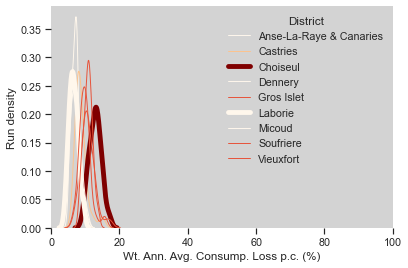

In [10]:
coloured_density_plots(outcomes, savefig, scheme='fisher_jenks', k=4)

In [11]:
tab = outcomes.iloc[:, 2:-1].groupby('district').describe().round(2)
column = 'n_new_poor'
tab = tab.sort_values(by=(column, 'mean'), ascending=False)
tab[[column]].iloc[:,1:].style.format("{:,.2f}")

## Weeks in poverty & Number of new poor

In [12]:
average_years_in_poverty = get_weeks_in_poverty_tab(outcomes)

if savetab:
    average_years_in_poverty.rename({'Anse-La-Raye & Canaries': 'Anse-La-Raye \& Canaries'}, inplace=True, axis=0)
    average_years_in_poverty.astype(int).style\
        .background_gradient(cmap='Blues', axis=0)\
        .set_caption('Average Years in Poverty By District')\
        .to_latex(f'../reports/tables/av_years_in_pov.tex',
                  # escape=False,
                  caption='Average Years in Poverty By District',
                  label='tab:av_years_in_pov',
                  convert_css=True,
                  multicol_align="|c|",
                  hrules=True,
                  position_float="centering")

In [ ]:
# Number of people in poverty for 1 / 3 / 5 years

In [13]:
average_years_in_poverty.sum(axis=1)

District
Anse-La-Raye & Canaries      7.520833
Castries                   210.916667
Choiseul                    43.395833
Dennery                      8.437500
Gros Islet                 100.333333
Laborie                     14.291667
Micoud                      11.645833
Soufriere                   32.833333
Vieuxfort                  132.104167
dtype: float64

In [14]:
average_years_in_poverty.astype(int).style\
        .background_gradient(cmap='Blues', axis=0)\
        .set_caption('Average Years in Poverty By District')

,0,1,2,3,4,5,6,7,8,9,10
District,,,,,,,,,,,
Anse-La-Raye & Canaries,0,0,0,0,1,2,1,0,0,0,0
Castries,0,9,19,11,50,50,12,0,35,9,13
Choiseul,0,0,1,2,4,9,19,4,0,0,1
Dennery,0,0,0,0,3,4,0,0,0,0,0
Gros Islet,0,2,1,12,27,14,19,0,23,0,0
Laborie,0,0,0,4,6,0,0,1,0,0,0
Micoud,0,1,1,0,6,0,0,0,0,0,0
Soufriere,0,0,0,3,6,1,6,11,2,0,0
Vieuxfort,0,0,2,60,62,0,1,4,0,0,0


In [15]:
# Get the number of new poor in each district
districts = outcomes['district'].unique().tolist()
n_districts = len(districts)
d = {}
for district in districts:
    df = outcomes[outcomes['district'] == district]
    d[district] = df['n_new_poor'].values.tolist()

In [16]:
# Make a coloured table
tab = pd.DataFrame(d).describe().T.sort_values('mean', ascending=False).round(2).drop('count', axis=1)
tab.style.background_gradient(cmap='Blues', subset=['mean'])\
         .background_gradient(cmap='Reds', subset=['std'])\
         .background_gradient(cmap='Greens', subset=['min'])\
         .background_gradient(cmap='Greens', subset=['25%'])\
         .background_gradient(cmap='Greens', subset=['50%'])\
         .background_gradient(cmap='Greens', subset=['75%'])\
         .background_gradient(cmap='Greens', subset=['max'])\
         .format(decimal='.', thousands=',', precision=2)

,mean,std,min,25%,50%,75%,max
Castries,211.00,206.13,0.00,0.00,195.50,362.50,652.00
Vieuxfort,132.06,157.11,0.00,0.00,59.50,231.00,516.00
Gros Islet,100.31,93.97,0.00,25.75,76.00,132.00,347.00
Choiseul,43.42,29.79,0.00,22.75,37.00,63.75,162.00
Soufriere,32.83,31.02,0.00,0.00,31.50,51.50,132.00
Laborie,14.29,16.68,0.00,0.00,11.50,22.25,63.00
Micoud,11.62,18.27,0.00,0.00,5.50,19.00,99.00
Dennery,8.44,21.14,0.00,0.00,0.00,1.25,120.00
Anse-La-Raye & Canaries,7.50,8.04,0.00,0.00,5.50,11.25,30.00


## Average vulnerability

In [17]:
vulnerability_by_quintile = get_average_weighted_vulnerability(outcomes, quintile=True)
vulnerability_by_quintile.T.style.format("{:.2f}")

District,Anse-La-Raye & Canaries,Castries,Choiseul,Dennery,Gros Islet,Laborie,Micoud,Soufriere,Vieuxfort
Quintile,,,,,,,,,
1,0.52,0.47,0.41,0.52,0.37,0.41,0.47,0.33,0.46
2,0.47,0.42,0.33,0.44,0.40,0.45,0.38,0.40,0.39
3,0.41,0.41,0.32,0.38,0.40,0.38,0.34,0.31,0.40
4,0.41,0.40,0.33,0.39,0.35,0.37,0.33,0.35,0.38
5,0.36,0.33,0.32,0.39,0.33,0.38,0.35,0.28,0.34


In [18]:
vulnerability_by_decile = get_average_weighted_vulnerability(outcomes, quintile=False)
vulnerability_by_decile.T.style.format("{:.2f}")

District,Anse-La-Raye & Canaries,Castries,Choiseul,Dennery,Gros Islet,Laborie,Micoud,Soufriere,Vieuxfort
Decile,,,,,,,,,
1,0.53,0.46,0.44,0.38,0.14,0.38,0.46,0.30,0.50
2,0.51,0.38,0.31,0.54,0.29,0.34,0.45,0.30,0.44
3,0.45,0.43,0.33,0.44,0.43,0.42,0.29,0.32,0.43
4,0.42,0.35,0.28,0.32,0.32,0.41,0.29,0.42,0.36
5,0.44,0.39,0.34,0.39,0.42,0.30,0.31,0.29,0.44
6,0.12,0.37,0.28,0.27,0.29,0.40,0.33,0.29,0.33
7,0.44,0.41,0.33,0.33,0.32,0.41,0.32,0.38,0.29
8,0.35,0.38,0.27,0.41,0.35,0.34,0.30,0.30,0.40
9,0.32,0.33,0.33,0.39,0.36,0.36,0.37,0.28,0.35


## Raincloud plots

Raincloud plot is a combination of a boxplot, a kernel density plot, and a dot plot. It is a great way to visualize the distribution of the data. Especially, when the distribution is skewed and you have a lot of data points.

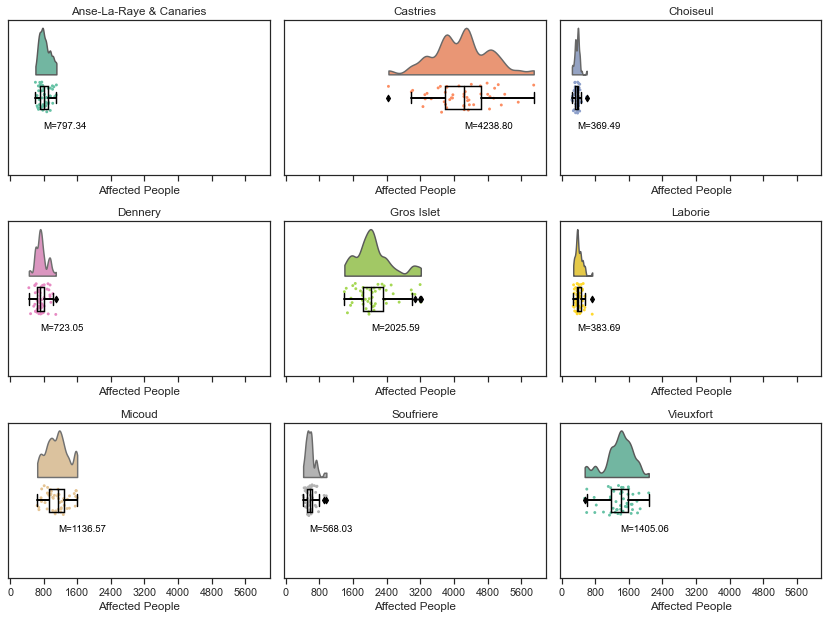

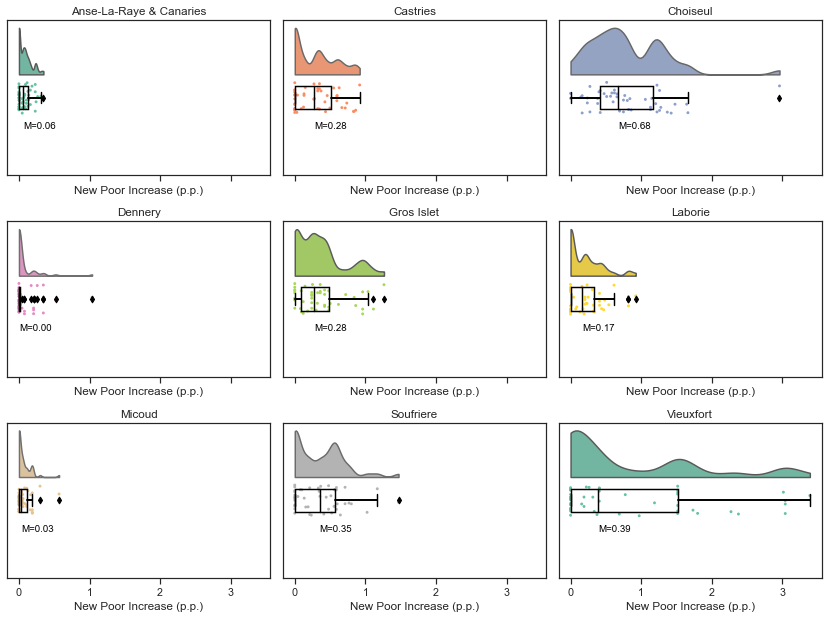

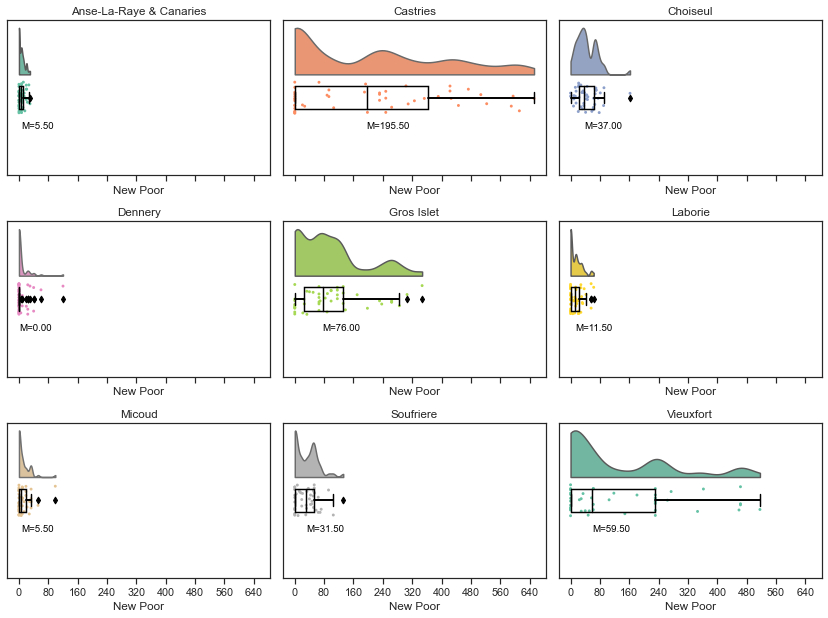

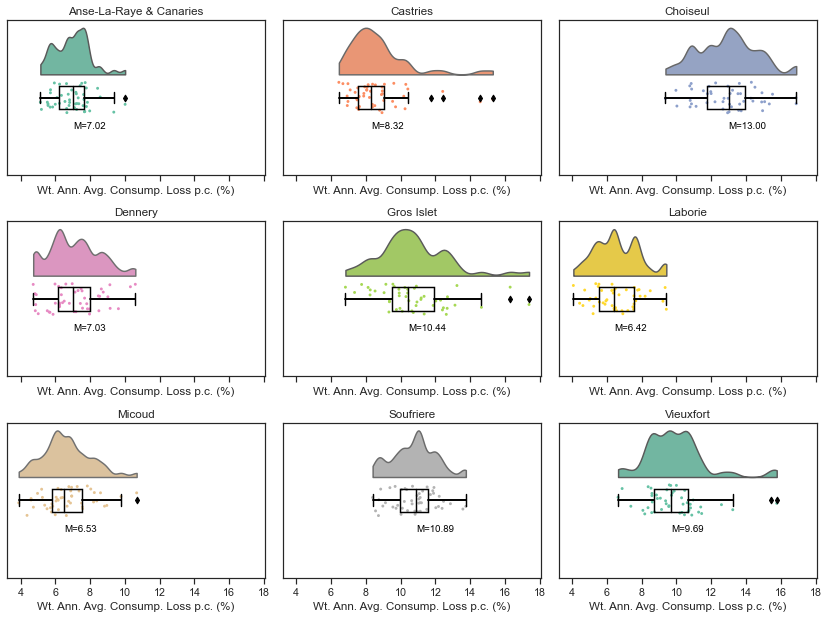

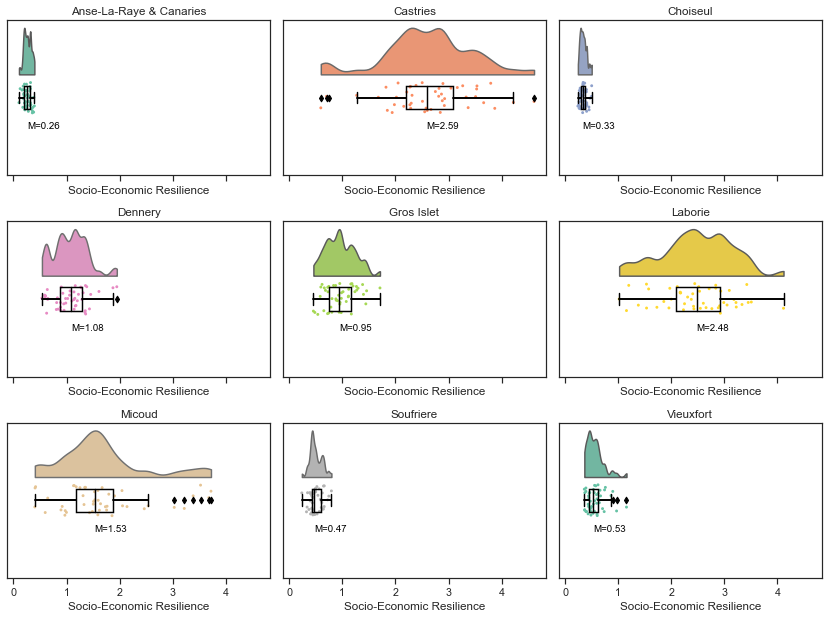

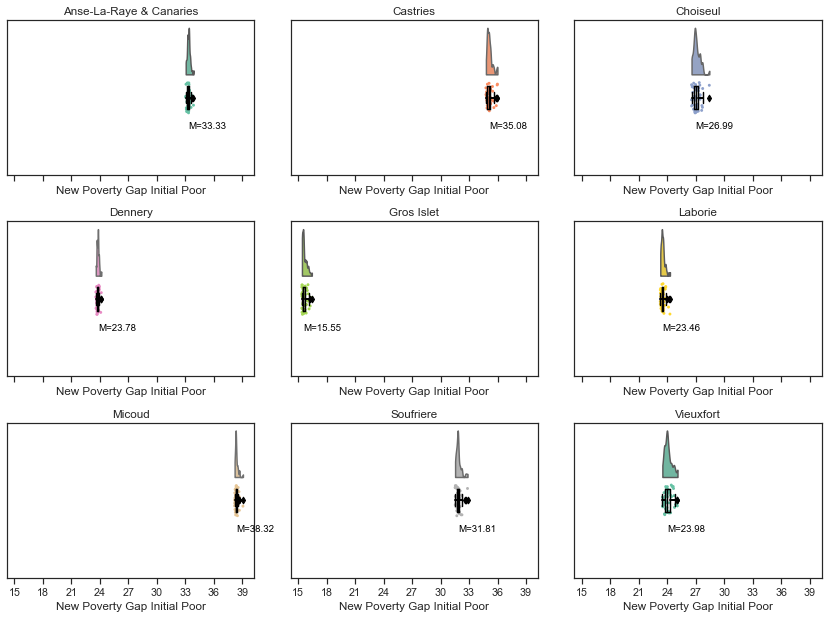

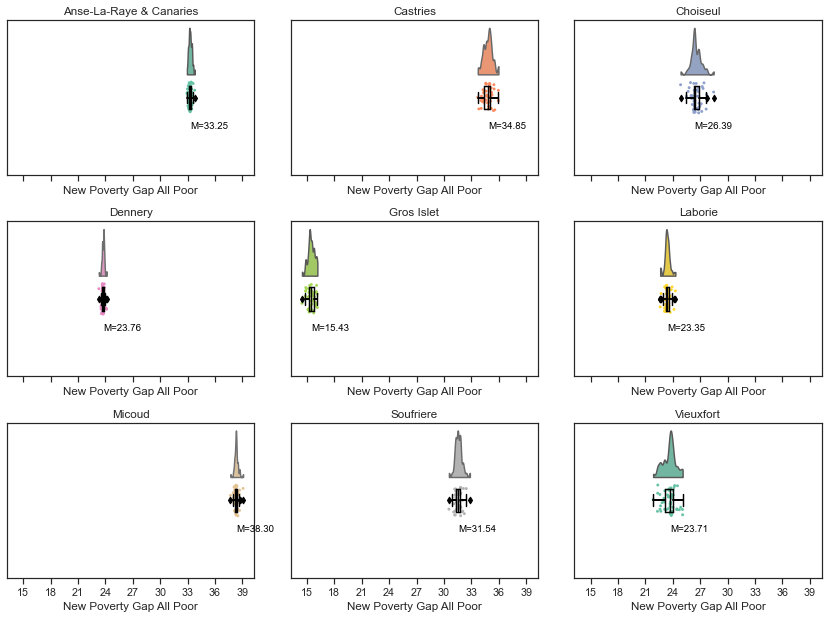

In [19]:
raincloud_plot(outcomes, savefig=savefig)

## Outcomes spatially

Another way to visualize the outcomes is to use choropleth maps. These maps are useful when you have data that is aggregated by a geographic area. For example, if we have data on how many people became poor after a disaster in the districts of Saint Lucia, we could use a choropleth map to show these numbers.  

What is important to remember is that **these maps do not show the variance** within each district. Instead, they show the mean or median value for each district.

In [20]:
# Get the country shapefile and aggregated outcomes
country = gpd.read_file('../data/raw/shapefiles/Saint Lucia/gadm36_LCA_shp/gadm36_LCA_0.shp')
aggregation = 'median'
outcomes['district'].replace({'Anse-La-Raye \& Canaries' : 'Anse-La-Raye & Canaries'}, inplace=True)
aggregated_outcomes = get_spatial_outcomes(outcomes, aggregation=aggregation)

# Convert to be in millions
aggregated_outcomes[['tot_exposed_asset', 'total_consumption_loss']] /= 1000000
aggregated_outcomes[['tot_exposed_asset', 'total_consumption_loss']] = aggregated_outcomes[['tot_exposed_asset', 'total_consumption_loss']].round(2)

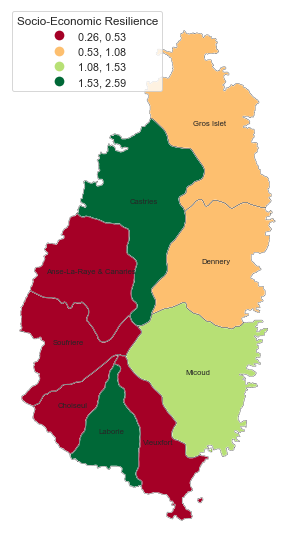

In [21]:
k = 4
scheme = 'fisher_jenks'
ax = aggregated_outcomes.plot(column='r', scheme=scheme, k=k, cmap='RdYlGn', legend=True, figsize=(10,10), legend_kwds={"title":"Socio-Economic Resilience", "loc" : "upper left"})
aggregated_outcomes.plot(ax=ax, color='none', edgecolor='black', linewidth=0.25)
ax.axis('off')
for idx, row in aggregated_outcomes.iterrows():
    ax.annotate(text=row['NAME_1'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=8)
if savefig:
    plt.savefig(f'../reports/figures/analysis/soc_econ_res_map.png', dpi=300, bbox_inches='tight')

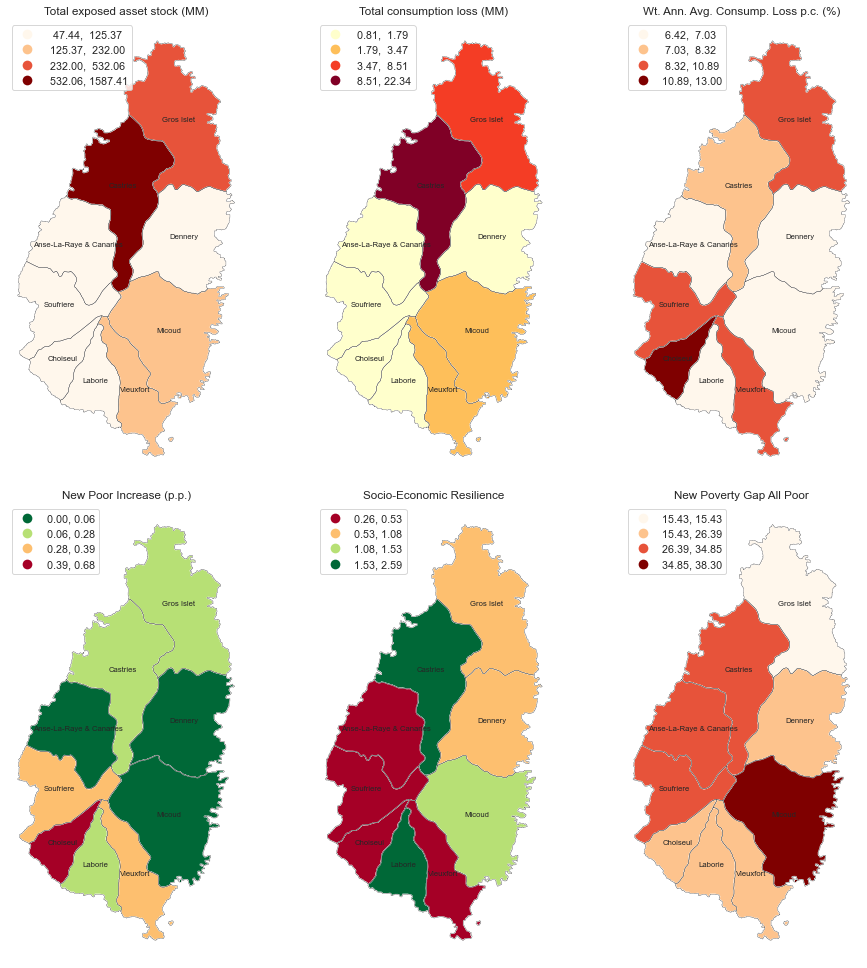

In [27]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14, 14))

outcomes_to_plot = [
    'tot_exposed_asset',
    'total_consumption_loss',
    'annual_average_consumption_loss_pct',
    'n_new_poor_increase_pp',
    'r',
    'new_poverty_gap_all']

titles = ['Total exposed asset stock (MM)',
          'Total consumption loss (MM)',
          'Wt. Ann. Avg. Consump. Loss p.c. (%)',
          'New Poor Increase (p.p.)',
          'Socio-Economic Resilience',
          'New Poverty Gap All Poor']

cmaps = ['OrRd', 'YlOrRd', 'OrRd', 'RdYlGn_r', 'RdYlGn', 'OrRd']

k = 4
for i, outcome in enumerate(outcomes_to_plot):
    aggregated_outcomes.plot(column=outcome, scheme='fisher_jenks', cmap=cmaps[i], k=k, ax=ax[i//3, i % 3], legend=True, legend_kwds={"loc": "upper left"})
    aggregated_outcomes.plot(ax=ax[i//3, i % 3], color='none', edgecolor='black', linewidth=0.25)
    ax[i//3, i % 3].set_title(titles[i])
    ax[i//3, i % 3].axis('off')
    for idx, row in aggregated_outcomes.iterrows():
        ax[i//3, i % 3].annotate(text=row['NAME_1'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=8)

# fig.suptitle(f'{aggregation.capitalize()} of 3,000 replications', fontsize=16)

fig.tight_layout()
if savefig:
    plt.savefig(
        f'../reports/figures/analysis/{aggregation}_outcomes_spatially.png', dpi=300, bbox_inches='tight')

A bivariate or bi-variate choropleth helps to visualise relations between two variables spatially. 

In [28]:
# Load asset damage data
asset_damage = pd.read_excel('../data/processed/asset_damage/Saint Lucia.xlsx')
asset_damage['district'].replace({'AnseLaRayeCanaries' : 'Anse-La-Raye & Canaries'}, inplace=True)
gdf = pd.merge(aggregated_outcomes, asset_damage, left_on='NAME_1', right_on='district', how='left')

In [29]:
# gdf['r'] = -gdf['r']

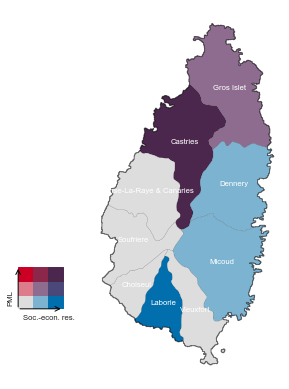

In [30]:
x_name = 'r'
y_name = 'pml'
x_label = 'Soc.-econ. res.'
y_label = 'PML'

tab = bivariate_choropleth(gdf.copy(), x_name, y_name, x_label, y_label, scheme='fisher_jenks', figsize=(7,6), return_table=True)
if savefig:
    plt.savefig('../reports/figures/analysis/bivariate_choropleth.png', dpi=300, bbox_inches='tight')

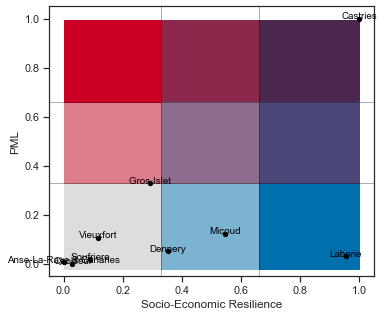

In [31]:
nine_quadrants_plot(gdf.copy(), x_name, y_name)
plt.xlabel('Socio-Economic Resilience')
plt.ylabel('PML')
if savefig:
    plt.savefig('../reports/figures/analysis/9_quadrants.png', dpi=300, bbox_inches='tight')